## 아주쉬운 유전체 분석 - 실습편(2019)

    작성일자 : 2020/05/29
    작성자 : 조예슬

    강의 : 제 14강
           Clustering and Classification (아주대 지별아) - 1. Classification and Clustering 이론 설명
           
           제 15강
           Clustering and Classification (아주대 지별아) - 2. hclust in R -1 
           
           제 16강
           Clustering and Classification (아주대 지별아) - 2. hclust in R -2 

#### Genomic data anlaysis

    - Clustering
    - Classification
    - hclust & heatmap

#### Classification vs Clustering

    * Classification
        : Pre-defined classes
        : Dataset consist of attributes and a class labels
          (어떤 데이터가 있게 된다면 그 데이터를 카테고리화 하는 것)
        : Goal is to predict classes from the object properties/attribute values
          (Pre-defined classes로 학습하여 데이터의 클래스를 정해줌 )
        : Classifiers are learned from sets od classified examples
        : Important : classifiers need to have a high accuracy
        : Supervised learning
          (학습 필요)
        : Provided Training Sample
    
    * Clustering
        : Goal id to identify similar groups of objects
          (어떤 데이터가 있게 되면 데이터를 유사한 것 끼리 묶게 되는것)
        : Groups(clusters, new classes) are discovered
          ( ex) 암종 molecular classification이 다르므로 group으로 구분되기 적합)
        : Important : similarity assessment which derives a "distance function" is critical, 
                      because clusters are discovered based on distance/density
                      (유사성 평가 -> data distance function으로 구하게 됨)
        : Unsuperviesed learning 
          (학습의 필요가 없음)
        : Not provided Training Sample
          (training 하는 샘플 자체가 필요 없음)
          
#### Classification
    1. Dataset은 반드시 class 정보가 있는 데이터셋을 준비해야함
        ex) 동그라미가 tumor, 네모가 normal이다 조직적으로 보게되니까 s1, s2로 나뉘어진다
    2. Dataset을 Training dataset/Test dataset으로 나눈다 
        ex) data가 어느정도 volume, size가 있어야한다 
            input으로 넣어줘야하는 sample수가 많아야 정확한 학습이 된다
    3. training dataset을 이용하여 모델을 트레이닝함
            training을 잘 할수 있는 classifier를 찾아내서 모델 트레이닝
    4. 학습모델을 이용한 test dataset의 class를 예측하고 예측정확도를 평가함
            정확도가 높아야함 예측에대한 정확도 평가는 실제값이 true, 아닌 값이 false라 하면
            
    * 예측정확도 평가
                                         (TP + TN)
                        Accuracy = ---------------------
                                    (TP + FP + FN + TN) 

            --------------------------------------------------------------
                                                   Fact (실제값)
            --------------------------------------------------------------
                                          Fact is True      Fact is False
             Predict  ----------------------------------------------------
            (예측치)    Predict as True        TP                 FP
                        Predict as False       FN                 TN
            --------------------------------------------------------------
    
#### Clustering
    1. Dataset
    
    2. Data preprocessing
        - Log2 transformation
        - Quantile normalization
        - Remove outliers : outlier가 많은 경우 사용
        - Z-normalization : 평균 0, 분산 1로 맞추기 

    3. Calculate distance
       (input data 자체를 가지고 distance 구하기)
        - Euclidean
        - Manhattan
        
    4. Select clustering algorithm
        - Single
        - Complete
        - Average
        - Centroid
        - Ward's
        
    5. Visualization & interpretation
    
#### Clustering - Hierarchical clustering (계층적 군집합)

    * 응집형(Agglomerative : Bottom-up)
        : 관찰된 모든 데이터를 하나의 cluster로 봄
          각 cluster의 유사성을 평가하여 군집화시킴
          반복해서 하나의 final cluster를 만들기

    * 분리형(Divisive : Top-down)
        : bottom-up에서 역으로 간다고 생각하면됨
          First cluster로 모든 data를 하나의 cluster로 만듦
          개체의 속성에 따라 cluster divide시킴
          
#### Clustering - Agglomerative clustering algorithm
    - Most popular hierarchical clustering technique
    - Basic algorithm : 
        Compute the distance matrix between input data points
        Let each data point be a cluster
        
        Repeat
        1. Merge the two closet clusters
        2. Update the distance matrix
        3. Until only a single cluster remain
        
    - Key operation is the computation of the distance between two clusters
    - Different definitions of the distance between clusters lead to different algorithms
    
    
#### Clustering - Calculate Distance

    * Euclidean distance
      : This is pretty much the most common distance measure
        대각선으로 연결한 가장 빠른길
      : sqrt(x - y)^2
      : euclidean distance in R : dist(data)  # default method = "euclidean"
      : Clustering distance matrix
          - Single linkage : 한 군집의 점과 다른 군집의 점 사이의 가장 짧은 거리(shortest distance, min)
          - Complete linkage : 한 군집의 점과 다른 군집의 점 사이의 가장 긴 거리(longest distance, max)
          - Centroid linkage : 한 군집의 평균과 다른 군집의 평균과의 거리 
          - Average linkage : 한 군집의 점과 다른 군집의 점 사이의 평균 거리, UPGMA(Unweighted pair group mean averaging)
          - Ward's method : 군집 내 편차들의 제곱합(within group sum of squares)에 근거를 두고 군집들을 병합시키는 방법
    
    * Manhattan distance
      : Also known as city block distance, Canberra distance.
        Incidentally, they're also pretty descriptive : The Manhattan distance is the shortest distance a car would have to drive in a city block structure to get from x to y
      : abs(x - y)

In [43]:
library("RColorBrewer")
library("ggplot2")
library("gplots")
library(Biobase)

#### Distance (example)

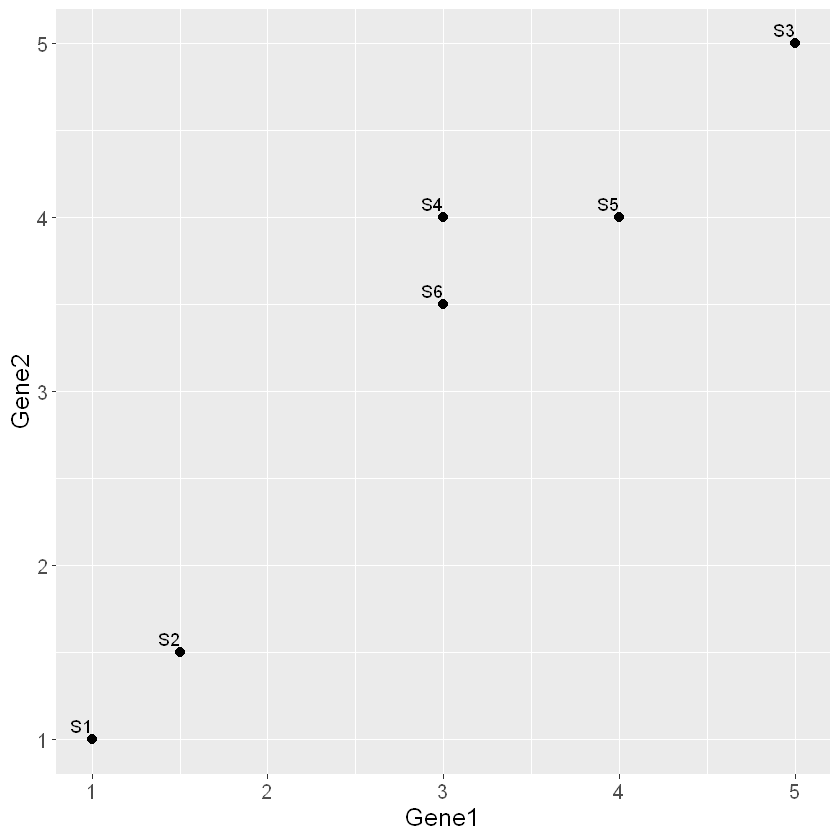

In [22]:
## data 만들기
Gene1 = c(1, 1.5, 5, 3, 4, 3)
Gene2 = c(1, 1.5, 5, 4, 4, 3.5)

df = cbind(Gene1, Gene2)
rownames(df) = c("S1", "S2", "S3", "S4", "S5", "S6")

df = as.data.frame(df) # ggplot으로 시각화시키려면 dataframe으로 만들어줘야함
ggplot(df, aes(x = Gene1, y = Gene2)) + geom_point(size = 2.5) + 
    geom_text(label = rownames(df), vjust = -0.5, hjust = 1) + theme(text = element_text(size=15))
# S1과 S2, S4와 S6이 비슷한 cluster를 가질것으로 보인다

In [28]:
## dist : distance matrix 
# Euclidean distance
d.eu = dist(df)
as.matrix(d.eu)  # 대각선 값

# manhattan
d.man = dist(df, method="manhattan")
as.matrix(d.man)  # 값이 상대적으로 크다 직선거리 두개를 완전히 다 지나가므로

,S1,S2,S3,S4,S5,S6
S1,0.0000000,0.7071068,5.656854,3.605551,4.242641,3.201562
S2,0.7071068,0.0000000,4.949747,2.915476,3.535534,2.500000
S3,5.6568542,4.9497475,0.000000,2.236068,1.414214,2.500000
S4,3.6055513,2.9154759,2.236068,0.000000,1.000000,0.500000
S5,4.2426407,3.5355339,1.414214,1.000000,0.000000,1.118034
S6,3.2015621,2.5000000,2.500000,0.500000,1.118034,0.000000


,S1,S2,S3,S4,S5,S6
S1,0.0,1.0,8.0,5.0,6.0,4.5
S2,1.0,0.0,7.0,4.0,5.0,3.5
S3,8.0,7.0,0.0,3.0,2.0,3.5
S4,5.0,4.0,3.0,0.0,1.0,0.5
S5,6.0,5.0,2.0,1.0,0.0,1.5
S6,4.5,3.5,3.5,0.5,1.5,0.0


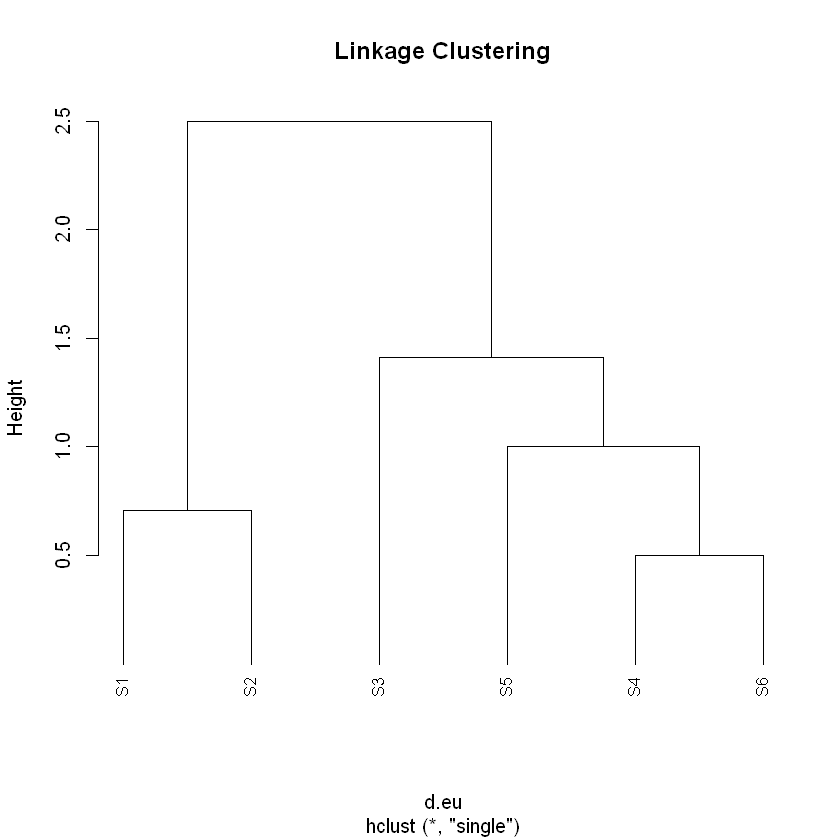

In [32]:
## hclust : Hierarchical Clustering
# d.eu single이용
res.df = hclust(d.eu, method = "single")
plot(res.df, hang = -1, cex = .8, main = "Linkage Clustering")
# single linkage 방법으로 거리 계산하여 나타난 결과
# (S1, S2), (S3, S4, S5, S6) 한묶음 
# Height부분은 S1, S2는 0.7071068 / S4, S6는 0.5 
# 자세한 사항은 PPT 자료 참고하기

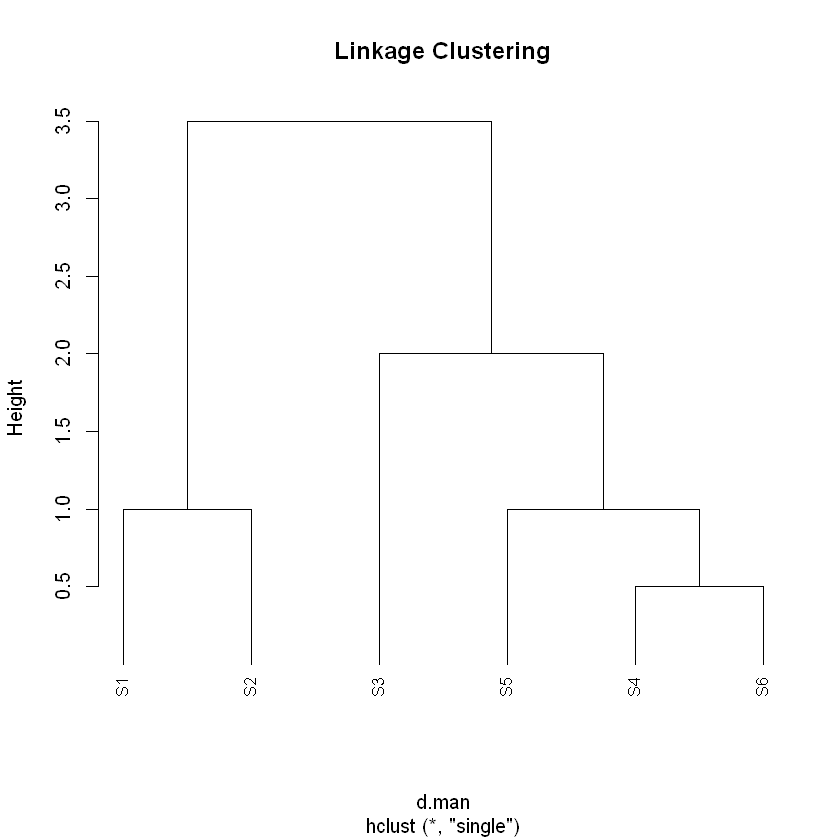

In [33]:
## hclust : Hierarchical Clustering
# d.man single이용
res.df = hclust(d.man, method = "single")
plot(res.df, hang = -1, cex = .8, main = "Linkage Clustering")
# 위의 d.eu의 값과 비교하면 clustering은 동일하고 height의 값만 다름을 볼 수 있다

#### ExpressionSet : eset

In [188]:
# load normalized ExpressionSet 
load("C:/Users/cho ye seul/Documents/예슬/공부/KGOL/아주쉬운유전체분석-실습(2019)/week7/data/norm_eset.rda")
eset
# control 샘플 3개, AC drug treatment 샘플 3개, SRC drug treatment 샘플 3개 

ExpressionSet (storageMode: lockedEnvironment)
assayData: 15406 features, 9 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: Sample_97L_1 Sample_97L_2 ... Sample_97L_P_SRC_3 (9
    total)
  varLabels: SID GEO_accession ... Treatment (7 total)
  varMetadata: labelDescription
featureData
  featureNames: A1BG A2M ... ZZZ3 (15406 total)
  fvarLabels: gene_id Dbxref product
  fvarMetadata: labelDescription
experimentData: use 'experimentData(object)'
Annotation:  

In [179]:
# 데이터 형태
exp = exp.log
dim(exp)
head(exp)
str(exp)

[1] 15406     9

,Sample_97L_1,Sample_97L_2,Sample_97L_3,Sample_97L_P_AC_1,Sample_97L_P_AC_2,Sample_97L_P_AC_3,Sample_97L_P_SRC_1,Sample_97L_P_SRC_2,Sample_97L_P_SRC_3
A1BG,0.000000,0.000000,0.000000,0.0000000,0.9840898,0.000000,2.053737,1.174151,0.000000
A2M,3.966092,2.062618,3.740939,4.0599773,2.5583472,1.001643,4.460219,5.126321,4.551561
A3GALT2,0.000000,0.000000,0.000000,0.9854635,0.0000000,0.000000,1.036046,0.000000,0.000000
A4GALT,9.874880,10.732107,10.687444,11.1306633,11.1222016,11.091409,10.546899,11.027185,10.457006
AAAS,9.930641,10.938505,10.942402,10.4394239,10.4130402,10.543410,10.961442,11.325856,10.549175
AACS,9.962097,10.708559,10.543102,10.9052222,10.9156555,10.980563,10.801643,11.044455,10.864504


 num [1:15406, 1:9] 0 3.97 0 9.87 9.93 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:15406] "A1BG" "A2M" "A3GALT2" "A4GALT" ...
  ..$ : chr [1:9] "Sample_97L_1" "Sample_97L_2" "Sample_97L_3" "Sample_97L_P_AC_1" ...


In [180]:
# distance (eucledian)
# 현재 상태로 distance를 구하게되면 유전자들끼리의 distance값을 구하게 됨
# 그래서 다시한번 행렬을 바꿔줘야함 
exp.t.df = as.data.frame(t(exp))
dim(exp.t.df)
exp.t.df[, 1:5] # 일부 확인

[1]     9 15406

,A1BG,A2M,A3GALT2,A4GALT,AAAS
Sample_97L_1,0.0000000,3.966092,0.0000000,9.87488,9.930641
Sample_97L_2,0.0000000,2.062618,0.0000000,10.73211,10.938505
Sample_97L_3,0.0000000,3.740939,0.0000000,10.68744,10.942402
Sample_97L_P_AC_1,0.0000000,4.059977,0.9854635,11.13066,10.439424
Sample_97L_P_AC_2,0.9840898,2.558347,0.0000000,11.12220,10.413040
Sample_97L_P_AC_3,0.0000000,1.001643,0.0000000,11.09141,10.543410
Sample_97L_P_SRC_1,2.0537375,4.460219,1.0360465,10.54690,10.961442
Sample_97L_P_SRC_2,1.1741512,5.126321,0.0000000,11.02719,11.325856
Sample_97L_P_SRC_3,0.0000000,4.551561,0.0000000,10.45701,10.549175


In [181]:
# distance
d = dist(exp.t.df)
length(d)
dis = as.matrix(d)
dis

[1] 36

,Sample_97L_1,Sample_97L_2,Sample_97L_3,Sample_97L_P_AC_1,Sample_97L_P_AC_2,Sample_97L_P_AC_3,Sample_97L_P_SRC_1,Sample_97L_P_SRC_2,Sample_97L_P_SRC_3
Sample_97L_1,0.0000,179.93476,134.0001,184.01326,174.02115,172.42952,195.89864,220.8017,186.49605
Sample_97L_2,179.9348,0.00000,112.3624,99.38737,105.18521,107.72696,108.41900,123.4944,107.07445
Sample_97L_3,134.0001,112.36244,0.0000,128.38089,119.04042,110.59825,134.04505,143.6060,137.07297
Sample_97L_P_AC_1,184.0133,99.38737,128.3809,0.00000,75.39422,81.58660,88.18490,107.5267,87.25853
Sample_97L_P_AC_2,174.0212,105.18521,119.0404,75.39422,0.00000,72.99954,90.21083,107.1306,89.13771
Sample_97L_P_AC_3,172.4295,107.72696,110.5983,81.58660,72.99954,0.00000,94.32017,107.2670,97.16882
Sample_97L_P_SRC_1,195.8986,108.41900,134.0450,88.18490,90.21083,94.32017,0.00000,88.9176,77.56454
Sample_97L_P_SRC_2,220.8017,123.49436,143.6060,107.52669,107.13064,107.26699,88.91760,0.0000,102.39055
Sample_97L_P_SRC_3,186.4961,107.07445,137.0730,87.25853,89.13771,97.16882,77.56454,102.3906,0.00000


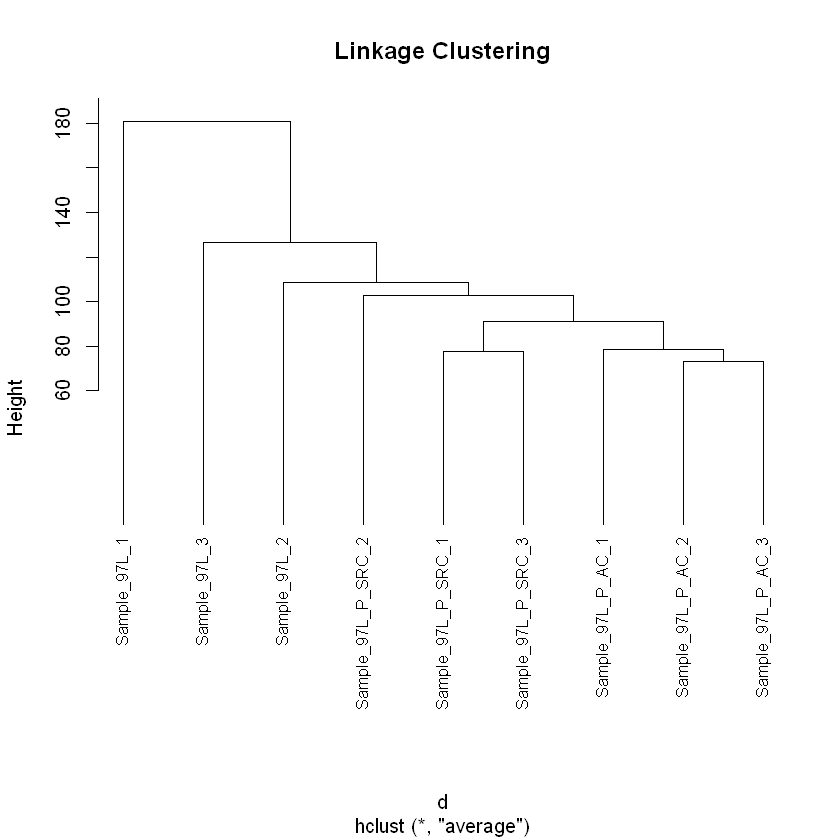

In [182]:
# clustering : using average linkage
res.avg = hclust(d, method = "average")
plot(res.avg, hang = -1, cex = .8, main = "Linkage Clustering")

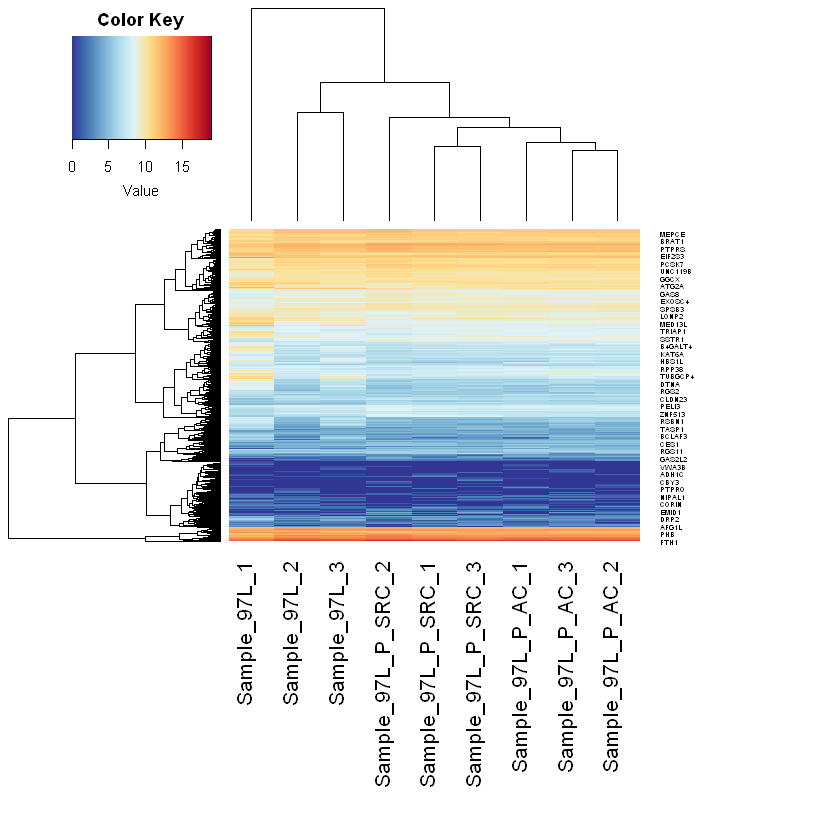

In [186]:
# heatmap으로 확인 : complete
col=colorRampPalette(brewer.pal(10, "RdYlBu"))(256)
heatmap.2(exp.log, distfun = dist, scale = "none", col=rev(col), margins=c(15,10), trace = "none", density.info = "none") #linkage method (complete)
# hclust를 통해 묶인게 heatmap.2 안에 들어가져있음 하지만 sample에 대한 순서 및 cluster가 다름
# linkage method default값이 complete로 되어져있어 다른 형태로 나옴
# 밑에부분에서는 method average로 만들어보쟝

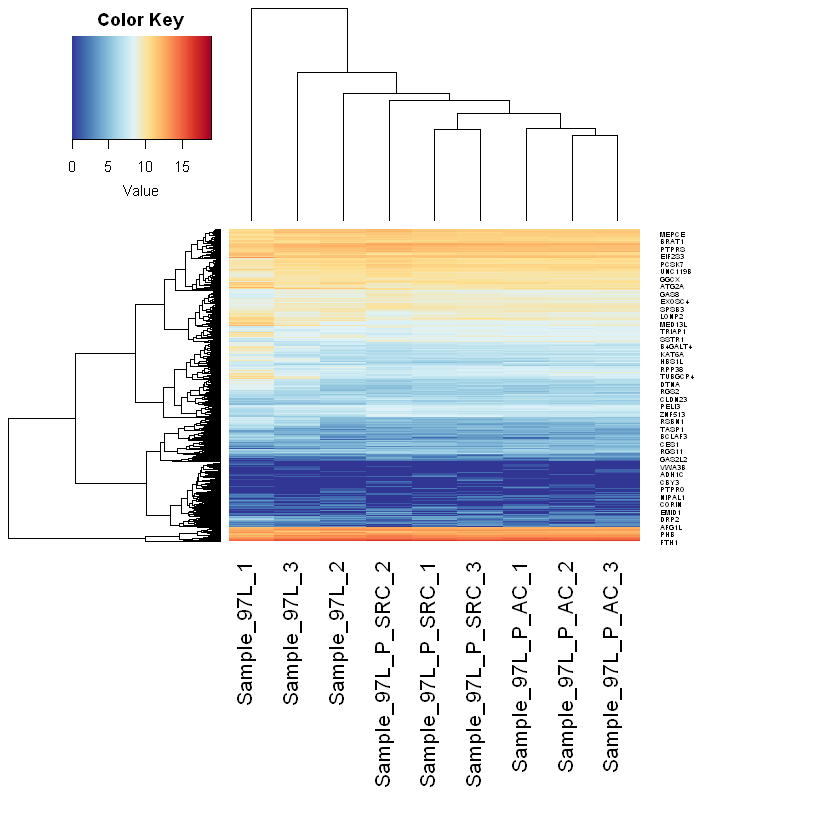

In [192]:
# clustering method(linkage method = average)
col_cluster = hclust(d, method = "average")
heatmap.2(exp.log, distfun = dist, scale = "none", col = rev(col), margins = c(15, 10), trace = "none", density.info = "none", Colv = as.dendrogram(col_cluster))

#### ExpressionSet : mset

In [193]:
# load normalized ExpressionSet 
load("C:/Users/cho ye seul/Documents/예슬/공부/KGOL/아주쉬운유전체분석-실습(2019)/week4/mset.rda")
mset

ExpressionSet (storageMode: lockedEnvironment)
assayData: 27574 features, 102 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: GSM1094712 GSM1094713 ... GSM1094813 (102 total)
  varLabels: sample_id geo_accession sample_type
  varMetadata: labelDescription
featureData
  featureNames: cg00000292 cg00002426 ... cg27665659 (27574 total)
  fvarLabels: ID GenomeBuild ... Symbol (7 total)
  fvarMetadata: labelDescription
experimentData: use 'experimentData(object)'
Annotation:  

In [198]:
# distance (eucledian)
m.exp = exprs(mset) # features : probe 단위로 이루어져 있음 
dim(mset)
head(mset)

Features  Samples 
   27574      102

ExpressionSet (storageMode: lockedEnvironment)
assayData: 1 features, 102 samples 
  element names: exprs 
protocolData: none
phenoData
  sampleNames: GSM1094712 GSM1094713 ... GSM1094813 (102 total)
  varLabels: sample_id geo_accession sample_type
  varMetadata: labelDescription
featureData
  featureNames: cg00000292
  fvarLabels: ID GenomeBuild ... Symbol (7 total)
  fvarMetadata: labelDescription
experimentData: use 'experimentData(object)'
Annotation:  

In [199]:
# t : returns the transpose of x
m.exp.df = as.data.frame(t(m.exp))
dim(m.exp.df)
m.exp.df[1:5, 1:5]

[1]   102 27574

,cg00000292,cg00002426,cg00003994,cg00005847,cg00006414
GSM1094712,0.6430991,0.3286876,0.14259820,0.2509158,0.07263885
GSM1094713,0.7428286,0.7513210,0.08799821,0.2241229,0.09259510
GSM1094714,0.6314446,0.4494186,0.17654420,0.2431118,0.15388150
GSM1094715,0.6582734,0.6059219,0.12513140,0.2126897,0.13026920
GSM1094716,0.5691917,0.4154620,0.19333590,0.3170569,0.24343860


In [201]:
# 변형된 dataframe으로 distance 구하기
md = dist(m.exp.df)
m.dis = as.matrix(md)
dim(m.dis)
head(m.dis)

[1] 102 102

,GSM1094712,GSM1094713,GSM1094714,GSM1094715,GSM1094716,GSM1094717,GSM1094718,GSM1094719,GSM1094720,GSM1094721,...,GSM1094804,GSM1094805,GSM1094806,GSM1094807,GSM1094808,GSM1094809,GSM1094810,GSM1094811,GSM1094812,GSM1094813
GSM1094712,0.00000,24.79973,14.590843,17.193961,13.70093,21.35865,29.88716,23.25780,16.165649,18.40981,...,13.742722,11.52351,16.08005,12.63063,22.06692,37.35515,15.48577,45.70312,15.66817,39.89724
GSM1094713,24.79973,0.00000,17.919131,12.361056,21.04852,21.22434,31.78882,23.86350,14.315811,18.01081,...,19.617187,21.93667,19.38052,21.08369,22.28788,35.95172,21.33431,46.29818,21.24150,38.00331
GSM1094714,14.59084,17.91913,0.000000,9.809064,11.27278,17.94213,27.37151,20.77104,11.181283,14.57123,...,9.958047,14.11172,13.51689,13.70960,18.42188,34.47188,14.44224,42.57654,12.30108,37.29008
GSM1094715,17.19396,12.36106,9.809064,0.000000,14.86889,18.96882,29.91429,22.08002,9.848601,13.57708,...,12.052433,15.72268,13.81960,15.25676,20.04363,35.77165,16.28391,45.35656,14.40352,38.29415
GSM1094716,13.70093,21.04852,11.272777,14.868894,0.00000,15.96452,27.50091,20.18649,10.808442,14.22189,...,14.147202,14.10603,17.20370,13.60742,18.94116,34.20783,13.67661,42.35340,15.90792,36.92238
GSM1094717,21.35865,21.22434,17.942129,18.968817,15.96452,0.00000,27.35622,21.27000,16.076158,18.26264,...,19.716429,19.96113,21.28632,19.07091,17.71732,32.40966,18.80784,41.18097,21.02554,33.98399


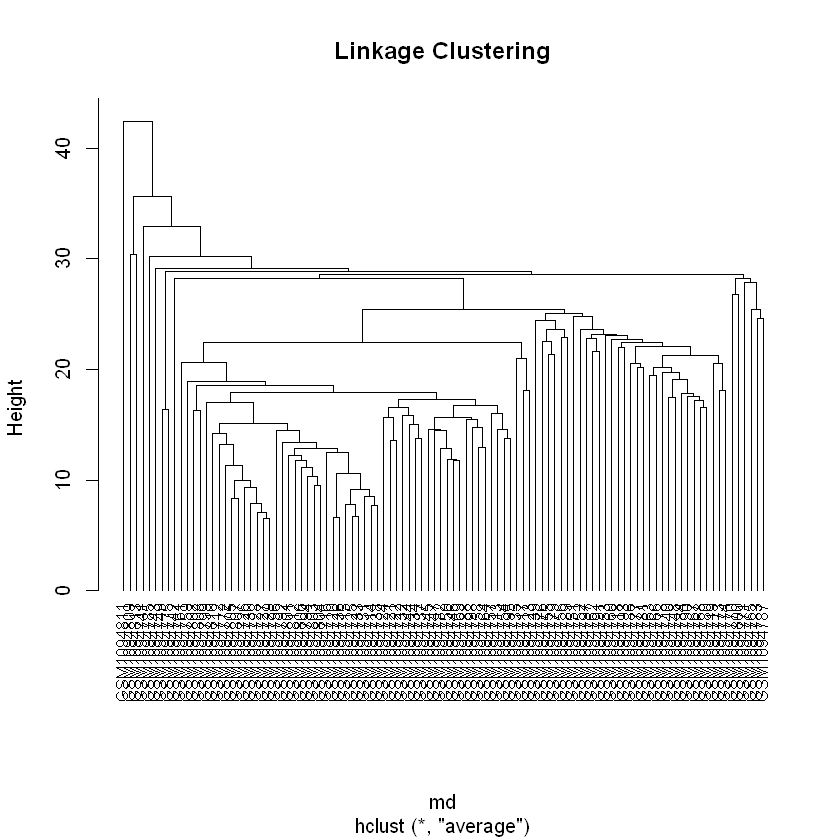

In [203]:
## differences between linkage methods
# average
m.res.avg = hclust(md, method = "average")
plot(m.res.avg, hang = -1, cex = .8, main = "Linkage Clustering")
# 끼리끼리 묶여져있는 패턴을 볼 수 있음 

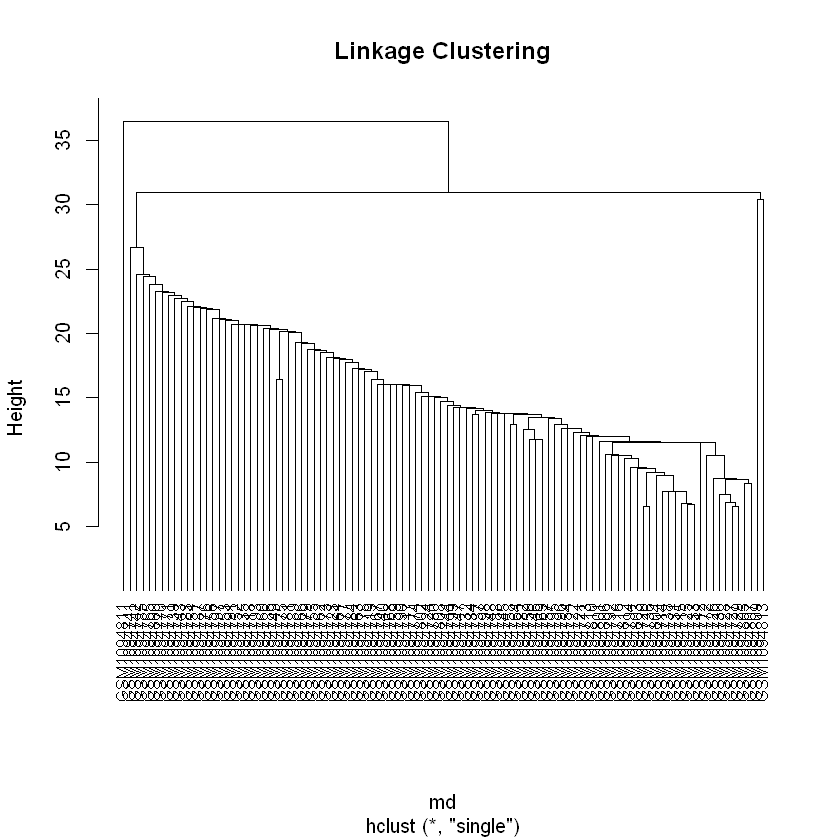

In [204]:
## differences between linkage methods
# single
m.res.sig = hclust(md, method = "single")
plot(m.res.sig, hang = -1, cex = .8, main = "Linkage Clustering")
# single linkage에서는 chanin effect가 자주 나타남
# chain effect : 짧고 길게 나타나는 현상

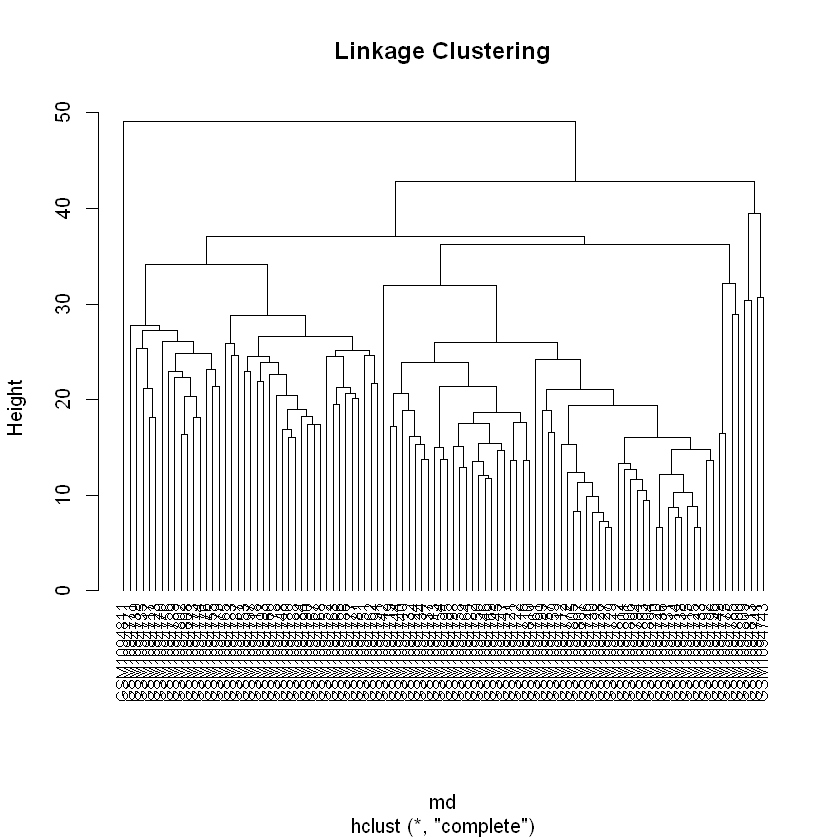

In [205]:
## differences between linkage methods
# complete
m.res.com = hclust(md, method = "complete")
plot(m.res.com, hang = -1, cex = .8, main = "Linkage Clustering")

    샘플 수가 많은 경우 clustering method를 어떤것을 사용하느냐에 따라 linkage 형태가 많이 달라짐
    대부분 average 사용 